In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from textblob import TextBlob

In [3]:

df = pd.read_csv("amazon_cleaned_preview.csv")

In [4]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%      4       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
 16  orig_l

In [6]:
df.describe()

orig_len
count   1465.000000
mean    1394.137884
std     1823.491796
min       67.000000
25%      505.000000
50%      823.000000
75%     1388.000000
max    18547.000000

In [7]:
def analyse_sentiment(review_content):
    analysis = TextBlob(review_content)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [8]:
df["Sentiment"] = df["review_content"].map(analyse_sentiment)

In [9]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%      4       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [10]:
def category(review_content):
    if "product" in review_content.lower():
        return "Product"
    elif "delivery" in review_content.lower():
        return "Delivery"
    elif "customer support" in review_content.lower():
        return "Customer Support"
    elif "design" in review_content.lower():
        return "Design"
    elif "prices" in review_content.lower():
        return "Prices"
    else:
        return "Other"

In [11]:
df["Category"] = df["review_content"].map(category)

In [12]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%      4       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [13]:
df.to_csv("customer_data.csv", index=False)

In [14]:
import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    print(f"Sentiment Scores: {sentiment_dict}")
    print(f"Negative Sentiment: {sentiment_dict['neg']*100}%")
    print(f"Neutral Sentiment: {sentiment_dict['neu']*100}%")
    print(f"Positive Sentiment: {sentiment_dict['pos']*100}%")
    
    if sentiment_dict['compound'] >= 0.05:
        return "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [17]:
df["Sentiment_2"] = df["review_content"].map(sentiment_scores)

Sentiment Scores: {'neg': 0.032, 'neu': 0.744, 'pos': 0.224, 'compound': 0.9033}
Negative Sentiment: 3.2%
Neutral Sentiment: 74.4%
Positive Sentiment: 22.400000000000002%
Sentiment Scores: {'neg': 0.01, 'neu': 0.821, 'pos': 0.169, 'compound': 0.9853}
Negative Sentiment: 1.0%
Neutral Sentiment: 82.1%
Positive Sentiment: 16.900000000000002%
Sentiment Scores: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.6808}
Negative Sentiment: 0.0%
Neutral Sentiment: 64.1%
Positive Sentiment: 35.9%
Sentiment Scores: {'neg': 0.028, 'neu': 0.8, 'pos': 0.172, 'compound': 0.8316}
Negative Sentiment: 2.8000000000000003%
Neutral Sentiment: 80.0%
Positive Sentiment: 17.2%
Sentiment Scores: {'neg': 0.116, 'neu': 0.719, 'pos': 0.165, 'compound': 0.9809}
Negative Sentiment: 11.600000000000001%
Neutral Sentiment: 71.89999999999999%
Positive Sentiment: 16.5%
Sentiment Scores: {'neg': 0.087, 'neu': 0.573, 'pos': 0.34, 'compound': 0.6611}
Negative Sentiment: 8.7%
Neutral Sentiment: 57.3%
Positive Sentiment:

In [18]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%      4       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [19]:
df.to_csv("Customer_data_2.csv", index=False)

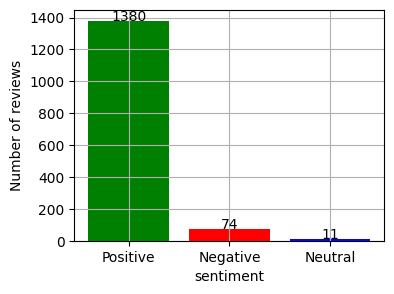

Sentiment_2
Positive    1380
Negative      74
Neutral       11
Name: count, dtype: int64


In [22]:
plt.figure(figsize=(4, 3))
data = df["Sentiment_2"].value_counts()
plt.bar(data.index,data.values,color=['green','red','blue'])
plt.xlabel("sentiment")
plt.ylabel("Number of reviews")
for i,v in enumerate(data.values):
    plt.text(i,v + 0.5,str(v), ha='center')
plt.grid()
plt.show()
print(data)